In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as stats
import warnings
import math

In [29]:
# Load your CSV file
df = pd.read_csv('../Dataset/Location1.csv')

In [30]:
df1=df.copy()

## Exploratory Data Analysis (EDA)

In [31]:
df1.head()

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
0,2017-01-02 00:00:00,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635
1,2017-01-02 01:00:00,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424
2,2017-01-02 02:00:00,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214
3,2017-01-02 03:00:00,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003
4,2017-01-02 04:00:00,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793


In [32]:
df1.tail()

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
43795,2021-12-31 19:00:00,34.1,94,32.5,1.00,1.91,53,137,2.5,0.1796
43796,2021-12-31 20:00:00,34.8,94,33.4,2.52,4.30,56,72,4.8,0.2066
43797,2021-12-31 21:00:00,34.1,95,33.0,1.10,1.84,360,45,4.3,0.2336
43798,2021-12-31 22:00:00,34.4,96,33.5,2.40,4.62,45,51,4.2,0.2606
43799,2021-12-31 23:00:00,35.0,97,34.2,2.26,5.04,45,51,4.3,0.2877


In [33]:
df1.describe()

,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
count,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000,43800.000000
mean,47.862911,72.288744,38.569308,3.591147,6.284431,203.637329,203.343676,7.771795,0.405385
std,19.453691,16.852287,18.772110,1.649318,2.685216,96.371262,97.959852,3.569147,0.288322
min,-14.400000,18.000000,-17.100000,0.000000,0.100000,1.000000,0.000000,0.500000,0.000000
25%,32.100000,60.000000,24.300000,2.410000,4.380000,132.000000,130.000000,5.000000,0.148900
50%,47.300000,74.000000,38.100000,3.300000,6.080000,225.000000,226.000000,7.200000,0.347650
75%,64.500000,86.000000,54.700000,4.590000,7.990000,277.000000,278.000000,10.000000,0.659600
max,94.100000,100.000000,76.300000,13.450000,20.650000,360.000000,360.000000,29.200000,0.991300


In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43800 entries, 0 to 43799
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Time                 43800 non-null  object 
 1   temperature_2m       43800 non-null  float64
 2   relativehumidity_2m  43800 non-null  int64  
 3   dewpoint_2m          43800 non-null  float64
 4   windspeed_10m        43800 non-null  float64
 5   windspeed_100m       43800 non-null  float64
 6   winddirection_10m    43800 non-null  int64  
 7   winddirection_100m   43800 non-null  int64  
 8   windgusts_10m        43800 non-null  float64
 9   Power                43800 non-null  float64
dtypes: float64(6), int64(3), object(1)
memory usage: 3.3+ MB


In [35]:
df1.isnull().sum()

Time                   0
temperature_2m         0
relativehumidity_2m    0
dewpoint_2m            0
windspeed_10m          0
windspeed_100m         0
winddirection_10m      0
winddirection_100m     0
windgusts_10m          0
Power                  0
dtype: int64

In [36]:
df1['Time']=pd.to_datetime(df1['Time'])

In [37]:
df1['Year']=df1['Time'].dt.year

In [40]:
df1['Month']=df1['Time'].dt.month
df1['Quarter']=df1['Time'].dt.quarter
df1['Day']=df1['Time'].dt.dayofweek

In [41]:
df1.head()

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,Year,Month,Quarter,Day
0,2017-01-02 00:00:00,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635,2017,1,1,0
1,2017-01-02 01:00:00,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424,2017,1,1,0
2,2017-01-02 02:00:00,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214,2017,1,1,0
3,2017-01-02 03:00:00,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003,2017,1,1,0
4,2017-01-02 04:00:00,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793,2017,1,1,0


In [42]:
df1.Day.unique()

array([0, 1, 2, 3, 4, 5, 6], dtype=int32)

In [43]:

day_mapping = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

# Apply the mapping using the dictionary
df1['Day'] = df1['Day'].map(day_mapping)

In [44]:
df1.head()

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,Year,Month,Quarter,Day
0,2017-01-02 00:00:00,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635,2017,1,1,Monday
1,2017-01-02 01:00:00,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424,2017,1,1,Monday
2,2017-01-02 02:00:00,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214,2017,1,1,Monday
3,2017-01-02 03:00:00,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003,2017,1,1,Monday
4,2017-01-02 04:00:00,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793,2017,1,1,Monday


In [45]:
df1.Day.unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

## Data Visualization


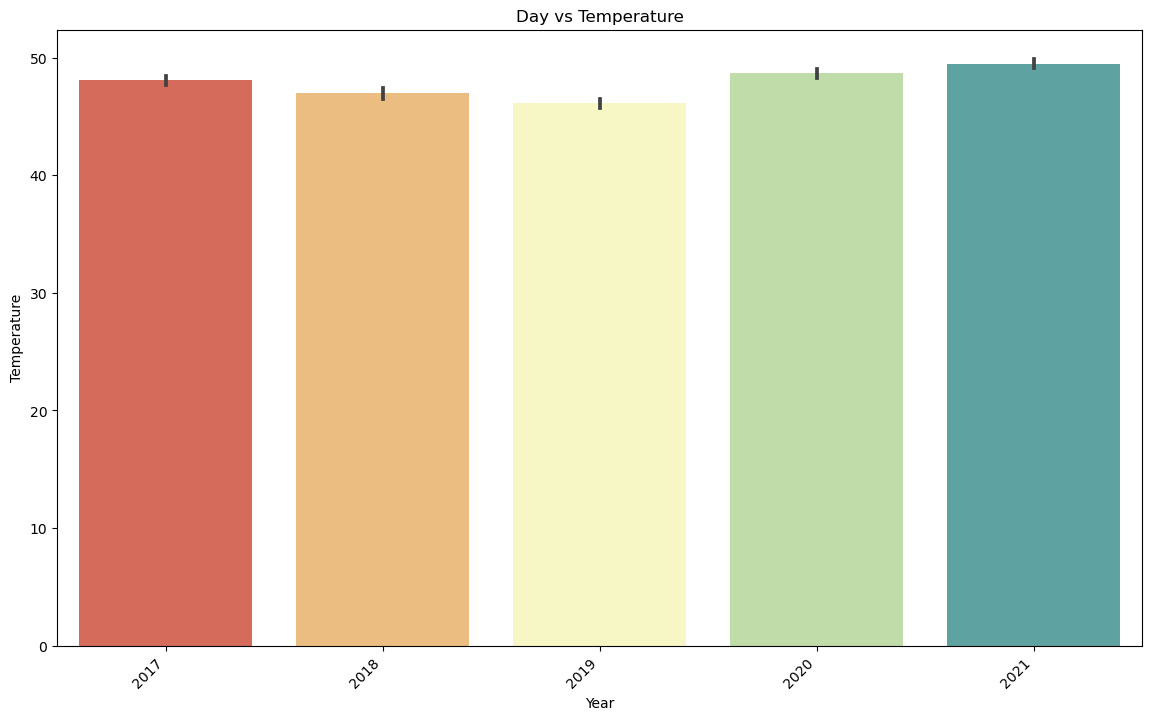

In [48]:
plt.figure(figsize=(14, 8))
sns.barplot(x='Year', y='temperature_2m', data=df1, palette='Spectral')
plt.title('Day vs Temperature')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.xticks(rotation=45, ha='right')
plt.show()

Text(0.5, 1.0, 'Power vs Year')

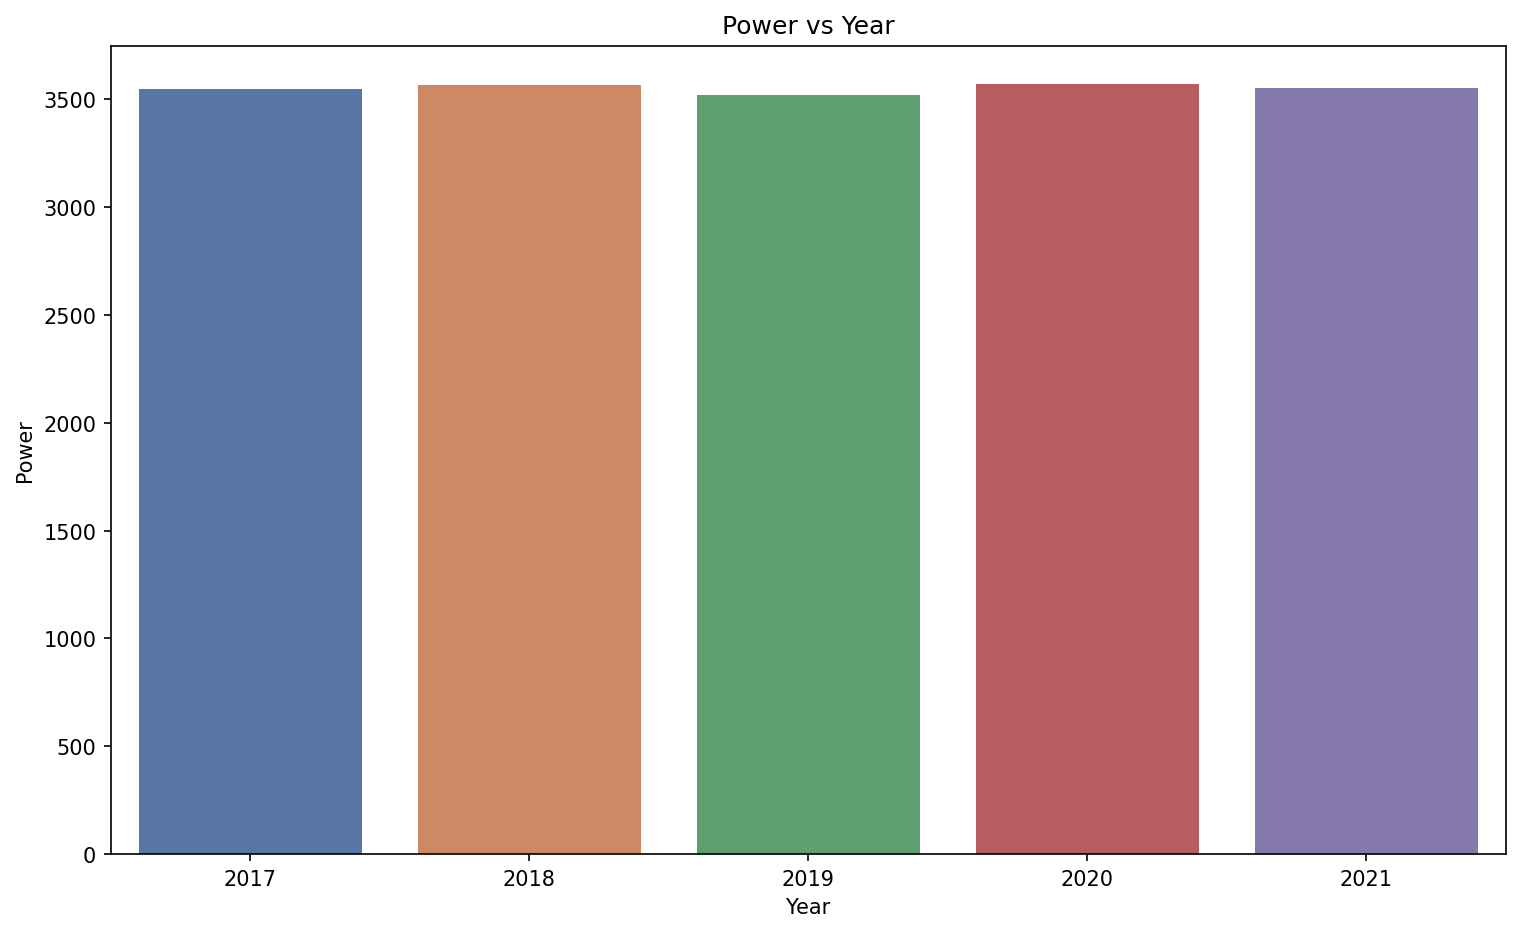

In [49]:
day_per_temperature = df1.groupby("Year")["Power"].sum().sort_values(ascending=False)

plt.figure(figsize = (12, 7), dpi = 150)
sns.barplot(x = day_per_temperature.index, y = day_per_temperature.values,palette='deep')
plt.xlabel("Year")
plt.ylabel("Power")
plt.title("Power vs Year")

In [50]:
columns=['temperature_2m', 'relativehumidity_2m', 'dewpoint_2m',
       'windspeed_10m', 'windspeed_100m', 'winddirection_10m',
       'winddirection_100m', 'windgusts_10m', 'Power']
threshold = 2
for i in columns:
    mean = np.mean(df1[i])
    std = np.std(df1[i])
    z_scores = np.abs((df1[i] - mean) / std)
    outliers = z_scores > threshold
    print("Removed outliers:")
    #print(df1[outliers].relativehumidity_2m)
    df1 = df1[~outliers]

Removed outliers:
Removed outliers:
Removed outliers:
Removed outliers:
Removed outliers:
Removed outliers:
Removed outliers:
Removed outliers:
Removed outliers:


<Axes: xlabel='Year'>

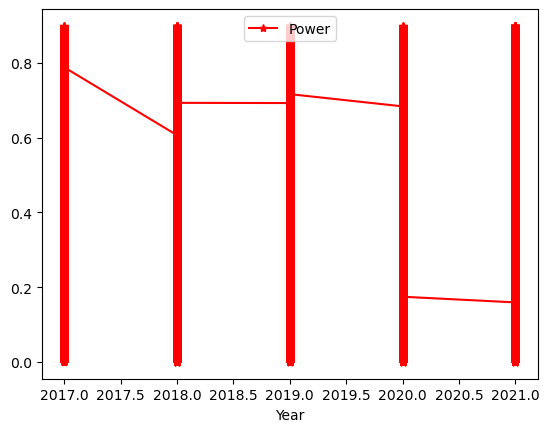

In [51]:
df1.plot('Year','Power',color='red',marker='*')

In [55]:
# Specify the file path where you want to save the CSV file
file_path = '../Dataset/Location1_preprocessed.csv'

# Save the DataFrame to a CSV file
df1.to_csv(file_path, index=False)

# Display a message indicating that the file has been saved
print(f"DataFrame has been saved to {file_path}")


DataFrame has been saved to ../Dataset/Location1_preprocessed.csv
